In [4]:
import numpy as np
import pandas as pd
import gudhi as gd  
from sklearn import manifold
from pylab import *
%matplotlib inline
import sklearn_tda

In [5]:
import gudhi
rips_complex = gudhi.RipsComplex(points=[[1, 1], [7, 0], [4, 6], [9, 6], [0, 14], [2, 19], [9, 17]],
                                 max_edge_length=12.0)

simplex_tree = rips_complex.create_simplex_tree(max_dimension=1)
result_str = 'Rips complex is of dimension ' + repr(simplex_tree.dimension()) + ' - ' + \
    repr(simplex_tree.num_simplices()) + ' simplices - ' + \
    repr(simplex_tree.num_vertices()) + ' vertices.'
print(result_str)
fmt = '%s -> %.2f'
for filtered_value in simplex_tree.get_filtration():
    print(fmt % tuple(filtered_value))


Rips complex is of dimension 1 - 18 simplices - 7 vertices.
[0] -> 0.00
[1] -> 0.00
[2] -> 0.00
[3] -> 0.00
[4] -> 0.00
[5] -> 0.00
[6] -> 0.00
[2, 3] -> 5.00
[4, 5] -> 5.39
[0, 2] -> 5.83
[0, 1] -> 6.08
[1, 3] -> 6.32
[1, 2] -> 6.71
[5, 6] -> 7.28
[2, 4] -> 8.94
[0, 3] -> 9.43
[4, 6] -> 9.49
[3, 6] -> 11.00


In [6]:
BarCodes_Rips0 = simplex_tree.persistence()
for i in (BarCodes_Rips0):
    print(i)

(0, (0.0, inf))
(0, (0.0, 8.94427190999916))
(0, (0.0, 7.280109889280518))
(0, (0.0, 6.082762530298219))
(0, (0.0, 5.830951894845301))
(0, (0.0, 5.385164807134504))
(0, (0.0, 5.0))


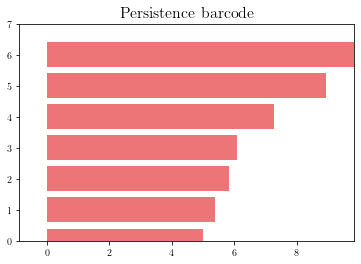

In [11]:
gudhi.plot_persistence_barcode(BarCodes_Rips0)

[(0, (3.1622776601683795, inf)), (0, (3.1622776601683795, 5.39834563766817)), (0, (3.1622776601683795, 5.39834563766817))]


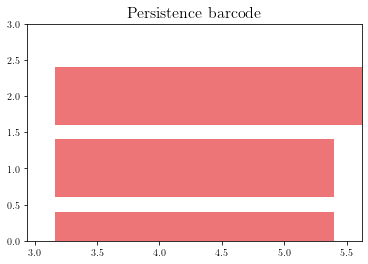

In [13]:
import numpy as np
from scipy.spatial.distance import cdist
from gudhi.point_cloud.dtm import DistanceToMeasure
from gudhi.weighted_rips_complex import WeightedRipsComplex
from gudhi import plot_persistence_barcode
pts = np.array([[2.0, 2.0], [0.0, 1.0], [3.0, 4.0]])
dist = cdist(pts,pts)
dtm = DistanceToMeasure(2, q=2, metric="precomputed")
r = dtm.fit_transform(dist)
w_rips = WeightedRipsComplex(distance_matrix=dist, weights=r)
st = w_rips.create_simplex_tree(max_dimension=2)
print(st.persistence())
plot_persistence_barcode(st.persistence())

[[2. 2.]
 [0. 1.]
 [3. 4.]] [[0 1 2]]


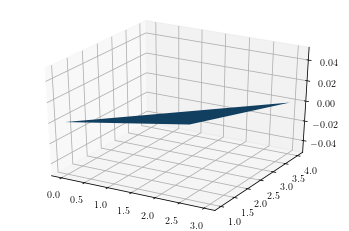

In [24]:
points = pts
rc = w_rips

# We are only going to plot the triangles
triangles = np.array([s[0] for s in st.get_skeleton(2) if len(s[0])==3])

print(pts, triangles)
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_trisurf(points[:,0], points[:,1], [0,0,0], triangles=triangles)
plt.show()